   **Assignment 2 - Regression (Expander_data.csv)**


  **DATA PREPROCESSING**

   **IMPORTING IMPORTANT LIBRARIES**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/expander-data/Expander_data.csv


**IMPORTING DATASET**

In [2]:
data=pd.read_csv('/kaggle/input/expander-data/Expander_data.csv')

**DESCRIBING DATASET**

In [3]:
data.describe()


,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F),Run Status
count,296450.000000,296450.000000,296450.000000,296450.000000,296450.000000,296450.000000,296450.000000,0.0
mean,590.541350,-231.564934,8119.917777,2955.416695,2.005667,186.991087,-229.764934,NaN
std,23.216552,3.574107,398.049531,54.201467,2.488568,56.205183,3.574136,NaN
min,552.420048,-238.594971,7056.004500,2835.750571,-0.200000,69.983885,-236.816223,NaN
25%,572.757269,-234.171427,7916.322054,2906.336126,0.000000,143.468467,-232.371760,NaN
50%,586.491792,-230.922352,8144.161813,2961.788792,0.000000,183.270451,-229.122946,NaN
75%,605.986608,-229.585168,8388.610374,3000.863611,4.000000,223.580205,-227.785796,NaN
max,649.217417,-223.440125,8975.986378,3090.367995,8.026667,324.411576,-221.617102,NaN


In [4]:
#shape of dataset
data.shape

(296450, 9)

In [5]:
#Viewing top five dataset
data.head()

,Timestamp,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F),Run Status
0,1/4/2020 21:20,596.100853,-229.436683,7925.800487,2999.411045,6.0,226.044931,-227.614448,NaN
1,1/4/2020 21:20,596.838217,-230.453708,8085.917724,2989.706617,6.0,217.150974,-228.668636,NaN
2,1/4/2020 21:20,596.468895,-229.545356,7902.175243,3006.331679,6.0,226.054086,-227.755324,NaN
3,1/4/2020 21:20,603.568271,-230.309438,7991.808959,3010.487486,6.0,226.016182,-228.489113,NaN
4,1/4/2020 21:21,595.407372,-229.767969,7871.560747,2986.665518,6.0,227.769383,-227.971795,NaN


In [6]:
#Printing all columns of dataset
data.columns

Index(['Timestamp', 'Suction Pressure (psig)', 'Suction Temperature (F)',
       'Total Flow (gpm)', 'Speed (rpm)', 'By-pass Valve Position (%)',
       'Discharge Pressure (psig)', 'Discharge Temperature (F)', 'Run Status'],
      dtype='object')

In [7]:
#feature formation
features=['Timestamp', 'Suction Pressure (psig)', 'Suction Temperature (F)',
       'Total Flow (gpm)', 'Speed (rpm)', 'By-pass Valve Position (%)',
        'Discharge Temperature (F)', 'Run Status']

In [8]:
#defining features matrix X and prediction value y
X=data[features]
y=data['Discharge Pressure (psig)']

In [9]:
#since the feature 'Timestamp' does not affect the Discharge Pressure prediction and therefore it can be drop
X.drop(['Timestamp'],axis=1,inplace=True)
#since the feature 'Run Status' is unavailable in dataset and therefore it can be drop
X.drop(['Run Status'],axis=1,inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
X.head()

,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Temperature (F)
0,596.100853,-229.436683,7925.800487,2999.411045,6.0,-227.614448
1,596.838217,-230.453708,8085.917724,2989.706617,6.0,-228.668636
2,596.468895,-229.545356,7902.175243,3006.331679,6.0,-227.755324
3,603.568271,-230.309438,7991.808959,3010.487486,6.0,-228.489113
4,595.407372,-229.767969,7871.560747,2986.665518,6.0,-227.971795


In [11]:
#checking if any missing data in our dataset
X.isnull().sum()

Suction Pressure (psig)       0
Suction Temperature (F)       0
Total Flow (gpm)              0
Speed (rpm)                   0
By-pass Valve Position (%)    0
Discharge Temperature (F)     0
dtype: int64

In [12]:
#Splitting dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
#Feature Scaling for better accuracy of model by making all features values on same scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

**DATA VISUALISATION**

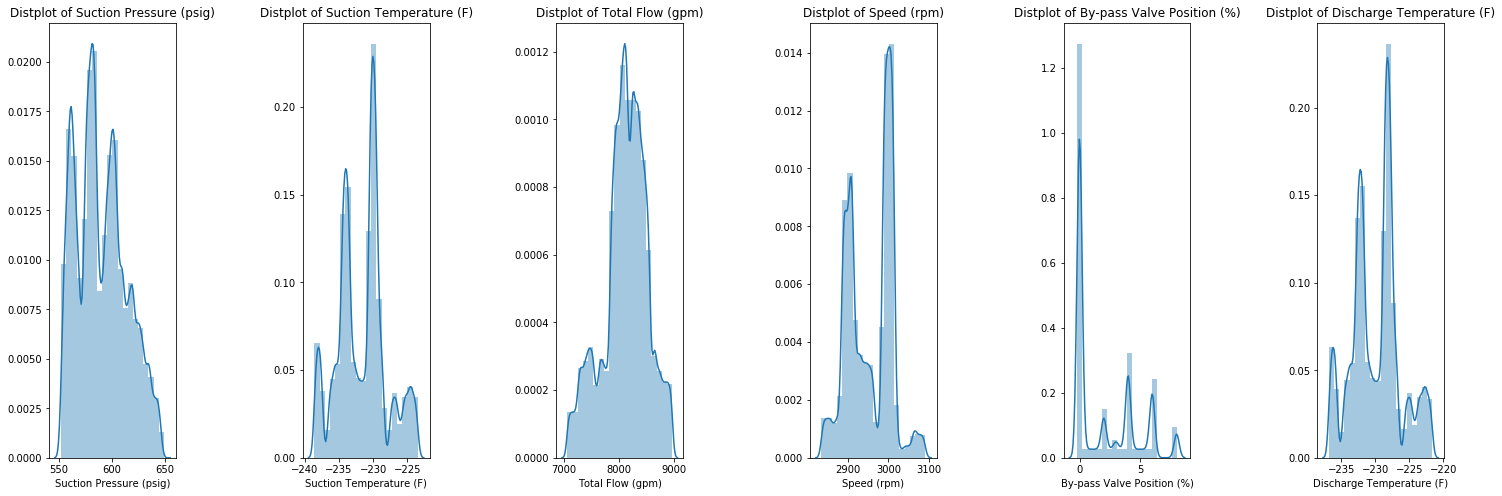

In [14]:
#visualisation of data
plt.figure(1 , figsize = (25 , 8))
n = 0 
for x in ['Suction Pressure (psig)', 'Suction Temperature (F)',
       'Total Flow (gpm)', 'Speed (rpm)', 'By-pass Valve Position (%)',
        'Discharge Temperature (F)']:
    n += 1
    plt.subplot(1 , 6 , n)
    plt.subplots_adjust(hspace =1 , wspace = 1)
    sns.distplot(data[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [15]:
#Fitting training dataset on RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=20)
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [16]:
#prediction on training and test dataset
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)


**MEASURING ACCURACY OF MODEL USING RMSE VALUE**

In [17]:
#checking accuracy of model using rmse value on training dataset
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_pred_train))
print(rms)

0.5406622956869749


In [18]:
#checking accuracy of model using rmse value on test dataset
rms = sqrt(mean_squared_error(y_test, y_pred_test))
print(rms)

1.371708162533256


**rmse value can be minimizes by increasing n_estimators value**

**THANK YOU**